In [1]:
# importing nessesary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#loading train data
data = pd.read_csv("dataset.csv")

In [3]:
#test data
test_data = pd.read_csv("test_data.csv")
test_data

,test(P_smoker),test(P_exercise)
0,0.334847,0.334546
1,0.334960,0.400981
2,0.335459,0.378434
3,0.337949,0.477065
4,0.341565,0.358447
...,...,...
161,0.659822,0.176518
162,0.661749,0.183025
163,0.661837,0.179130
164,0.662886,0.174768


## 1. Start by graphing the data using only 1 chart, in a meaningful way that captures all the stories in the data. (Be sure to use graphing best practices or marks will be deducted.)

In [4]:
#getting groups
premium = data.groupby(data['Premiums'])
data_high = premium.get_group('High')
data_low =  premium.get_group('Low')
X_cordinates = data_high['P(smoker)']
Y_cordinates = data_high['P(exercise)']
X_cordinates1 = data_low['P(smoker)']
Y_cordinates1 = data_low['P(exercise)']

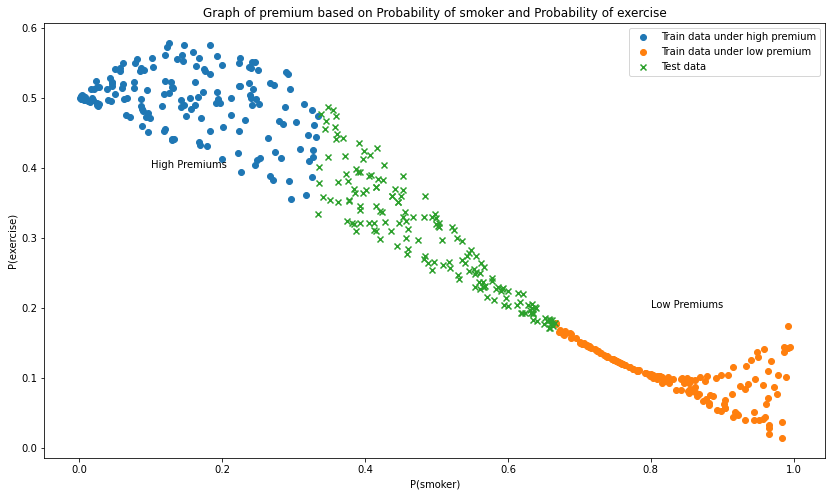

In [5]:
#plotting
plt.figure(figsize = (14,8))
plt.title('Graph of premium based on Probability of smoker and Probability of exercise')
plt.scatter(X_cordinates,Y_cordinates, label='Train data under high premium')
plt.scatter(X_cordinates1,Y_cordinates1, label='Train data under low premium')
plt.scatter(test_data['test(P_smoker)'],test_data['test(P_exercise)'], marker = 'x', label='Test data')
# plt.plot([0.5,0.5],[0,0.6],linestyle='dotted')
# plt.plot([0,1],[0.3,0.3],linestyle='dotted')
plt.xlabel("P(smoker)")
plt.ylabel("P(exercise)")
plt.text(0.1,0.4,"High Premiums")
plt.text(0.8,0.2,"Low Premiums")
plt.legend()

In the above graph we have plotted both test and training data, in a way high premium people were grouped as blue, low premium were gouped as orange. And we have added test data grouped as green colour.

## 2. Describe the data set in detail, and note any stories the data is telling you.  Be sure to explain why you think there are any patterns.  Don't be afraid to conjecture (make guesses), but make sure you can explain any peculiarities (oddities) in the data.

## 3. Using the existing data, create a classifier model, and graph the output using best practices.  Be sure to explain/justify why you chose your model.

Among the 2 classifier models that is, Logistic regression and SVM, we have chosen the Logistic model for our analysis since it is a binary classification problem easier to implement as compared to SVM. Also we have little knowledge on SVM.

### Logistic Regression

In [7]:
# defining the sigmoid function to convert out inputs to get 0 or 1
def sigmoid_func(X):
    X = 1/(1+np.exp(-X))
    return X
    
def predict_class(X):
    X_class = []
    for i in range (len(X)):
        if X[i]>0.5:
            X_class.append(1)
        else:
            X_class.append(0)
    return X_class
    
def convert_premium(Y):
    Z =[]
    for i in range (len(Y)):
        if Y[i] == "High":
            Z.append(1)
        else:
            Z.append(0)
    return Z
def loss_func(Y,Y_hat):
    sum_loss =0
    for i in range (len(Y)):
        sum_loss += (Y[i]-Y_hat[i])**2  
    return sum_loss
def loss_partial_derivative(X,Y,Y_hat):
    m = 0
    b = 0
    for i in range (len(X)):
        m += -2*X[i]*(Y[i]-Y_hat[i])*(Y_hat[i])*(1-Y_hat[i])
        b += -2*(Y[i]-Y_hat[i])*(Y_hat[i])*(1-Y_hat[i])
    return m,b

In [8]:
def my_gradient_descent(X,Y):
    m = 0
    b = 0
    loss = 0
    alpha = 0.0006
    iterations = 1000
    loss_list = []
    for i in range (iterations):
        Y_hat = sigmoid_func(m*X+b)
        loss = loss_func(Y,Y_hat)
        dM = loss_partial_derivative(X,Y,Y_hat)[0]
        db = loss_partial_derivative(X,Y,Y_hat)[1]
        m -= alpha*dM*loss
        b -= alpha*db*loss
        loss_list.append(loss)
    return m,b,loss_list 

#### Model building for P(smoker)

In [9]:
m, b, loss_list =  my_gradient_descent(data['P(smoker)'],convert_premium(data['Premiums']))

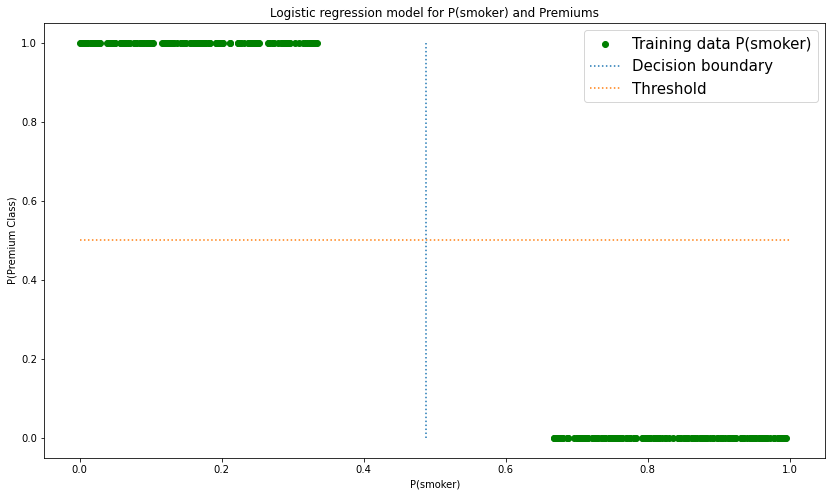

In [10]:
plt.figure(figsize = (14,8))
plt.title('Logistic regression model for P(smoker) and Premiums')
plt.scatter(x = data['P(smoker)'],y = predict_class(sigmoid_func(m*data['P(smoker)']+b)),color='green',label = 'Training data P(smoker)')
plt.plot([-b/m,-b/m],[0,1],linestyle='dotted',label='Decision boundary')
plt.ylabel('P(Premium Class)')
plt.xlabel('P(smoker)')
plt.plot([0,1],[0.5,0.5],linestyle='dotted',label='Threshold')
plt.legend(fontsize=15)
plt.show()

#### Tuning for P(exercise)

In [11]:
m1, b1, loss_list =  my_gradient_descent(data['P(exercise)'],convert_premium(data['Premiums']))

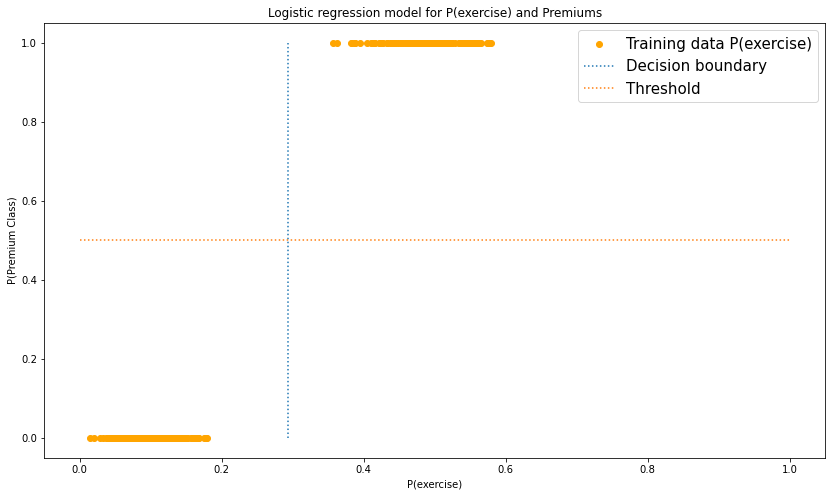

In [12]:
plt.figure(figsize = (14,8))
plt.title('Logistic regression model for P(exercise) and Premiums')
plt.scatter(x = data['P(exercise)'],y = predict_class(sigmoid_func(m1*data['P(exercise)']+b1)),color='orange',label = 'Training data P(exercise)')
plt.plot([-b1/m1,-b1/m1],[0,1],linestyle='dotted',label='Decision boundary')
plt.ylabel('P(Premium Class)')
plt.xlabel('P(exercise)')
plt.plot([0,1],[0.5,0.5],linestyle='dotted',label='Threshold')
plt.legend(fontsize=15)
plt.show()

## 4. Retune your model parameters to ensure you get a good model output, and discuss the tuning.

The hyperparameters we have chosen for tuning are alpha(learning rate), Threshold value.

In [13]:
def my_gradient_descent_tuner(X,Y,alpha):
    m = 0
    b = 0
    loss = 0
    iterations = 1000
    loss_list=[]
    for i in range (iterations):
        Y_hat = sigmoid_func(m*X+b)
        loss = loss_func(Y,Y_hat)
        dM = loss_partial_derivative(X,Y,Y_hat)[0]
        db = loss_partial_derivative(X,Y,Y_hat)[1]
        m -= alpha*dM*loss
        b -= alpha*db*loss
        loss_list.append(loss)
    return m,b,loss_list

### Tuning *'learning rate'* for P(smoker)vs premiums model

C:\Users\sudip\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


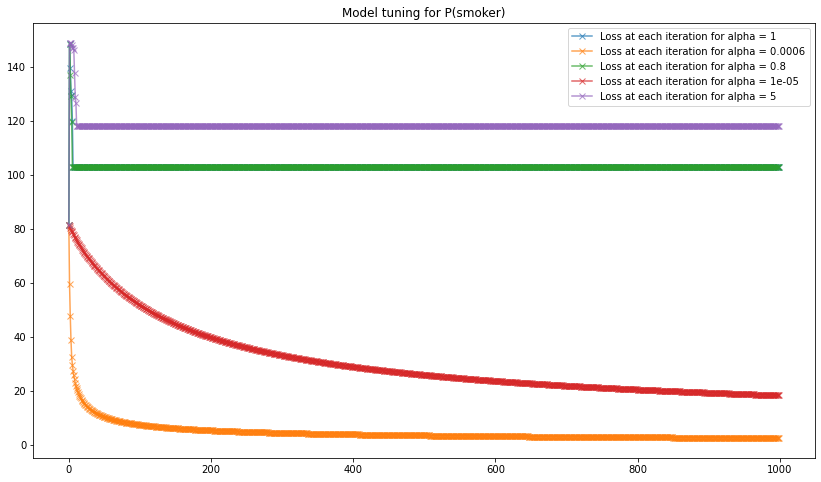

In [14]:
alpfa_list = [1,0.0006,0.8,0.00001,5]
m_list,b_list,ll=[],[],[]
for alpfa in alpfa_list:
    m_temp,b_temp, loss_list =  my_gradient_descent_tuner(data['P(smoker)'],convert_premium(data['Premiums']),alpfa)
    m_list.append(m_temp)
    b_list.append(b_temp)
    ll.append(loss_list)
plt.figure(figsize = (14,8))
plt.title('Model tuning for P(smoker)')
for loss_list,alpha in zip(ll,alpfa_list):
    plt.plot(range (len(loss_list)),loss_list,marker='x',label=f'Loss at each iteration for alpha = {alpha}', alpha=0.7)
    plt.legend()

from the above tuning process we can observe that learning rate of value 0.3 we are getting the minimum loss.

### Tuning *'learning rate'* for P(exercise) vs premiums model

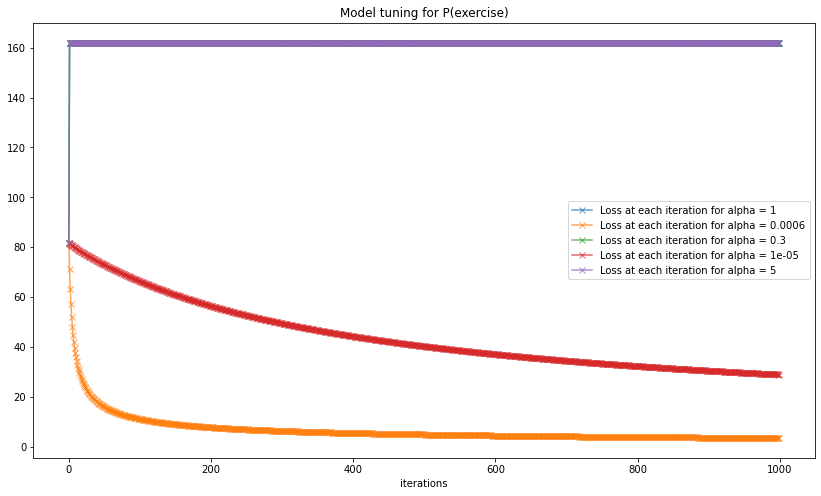

In [15]:
alpfa_list = [1,0.0006,0.3,0.00001,5]
m_list,b_list,ll=[],[],[]
for alpfa in alpfa_list:
    m1_temp,b1_temp, loss_list =  my_gradient_descent_tuner(data['P(exercise)'],convert_premium(data['Premiums']),alpfa)
    m_list.append(m1_temp)
    b_list.append(b1_temp)
    ll.append(loss_list)
plt.figure(figsize = (14,8))
plt.xlabel('iterations')
plt.title('Model tuning for P(exercise)')
for loss_list,alpha in zip(ll,alpfa_list):
    plt.plot(range (len(loss_list)),loss_list,marker='x',label=f'Loss at each iteration for alpha = {alpha}', alpha=0.7)
    plt.legend()

from the above tuning process we can observe that learning rate of value 0.0006 we are getting the minimum loss.

### Tuning *'Threshold value'* for P(smoker)vs premiums model

In [16]:
def predict_class_tuner(X, threshhold):
    X_class = []
    for i in range (len(X)):
        if X[i]>threshhold:
            X_class.append(1)
        else:
            X_class.append(0)
    return X_class

def get_accuracy(Y,Y_hat):
    matrix = np.array([[0,0],[0,0]])
    for i in range (len(Y)):
        if Y[i]==1 and Y_hat[i]==1:
            matrix[0][0]+=1  #True Positive
        elif Y[i]==1 and Y_hat[i]==0:
            matrix[0][1]+=1  # False Positive
        elif Y[i]==0 and Y_hat[i]==1:
            matrix[1][0]+=1  # False Negative
        else:
            matrix[1][1]+=1  # True Negative
    
    TP = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[1][1]
    N = data.shape[0]
    accuracy = (TP + TN) / N
    return accuracy

In [17]:
m,b

(-8.462695858631806, 4.121912556060395)

In [18]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for t in thresholds:
    print(f'at threshold = {t}--- accuracy = ',get_accuracy(convert_premium(data['Premiums']),
                                             predict_class_tuner(sigmoid_func(m*data['P(smoker)']+b),t)))

at threshold = 0.1--- accuracy =  0.8742331288343558
at threshold = 0.2--- accuracy =  1.0
at threshold = 0.3--- accuracy =  1.0
at threshold = 0.4--- accuracy =  1.0
at threshold = 0.5--- accuracy =  1.0
at threshold = 0.6--- accuracy =  1.0
at threshold = 0.7--- accuracy =  1.0
at threshold = 0.8--- accuracy =  0.9785276073619632
at threshold = 0.9--- accuracy =  0.8650306748466258


* we took different threshold values from 0.1 to 0.9.
* we classified data points based on our threshold values.
* we calculated accuracy from confusion matrix for each threshold values.
* For the range 0.2 - 0.7 threshold values we got the accuracy of 100%. And for threshold values below 0.2 and above 0.7 accuracy is decreasing
* so we used gradient descent to find best m & b and used threshold as 0.5.

### Tuning *'Threshold value'* for P(exercise)vs premiums model

In [19]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for t in thresholds:
    print(f'at threshold = {t}--- accuracy = ',get_accuracy(convert_premium(data['Premiums']),
                                             predict_class_tuner(sigmoid_func(m1*data['P(exercise)']+b1),t)))

at threshold = 0.1--- accuracy =  0.7822085889570553
at threshold = 0.2--- accuracy =  1.0
at threshold = 0.3--- accuracy =  1.0
at threshold = 0.4--- accuracy =  1.0
at threshold = 0.5--- accuracy =  1.0
at threshold = 0.6--- accuracy =  1.0
at threshold = 0.7--- accuracy =  0.9969325153374233
at threshold = 0.8--- accuracy =  0.9754601226993865
at threshold = 0.9--- accuracy =  0.8773006134969326


* we took different threshold values from 0.1 to 0.9.
* we classified data points based on our threshold values.
* we calculated accuracy from confusion matrix for each threshold values.
* For the range 0.2 - 0.6 threshold values we got the accuracy of 100%. And for threshold values below 0.2 and above 0.6 accuracy is decreasing
* so we used gradient descent to find best m & b and used threshold as 0.5.

## 5. Prove and explain why the model is converging.

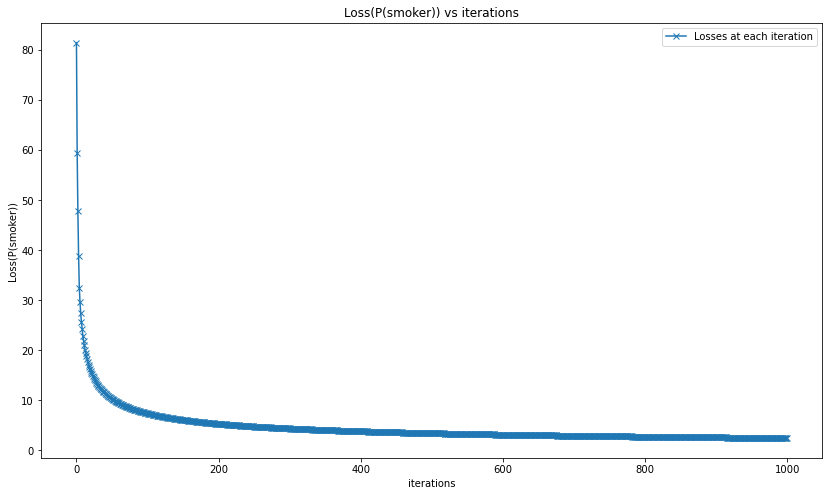

In [20]:
_,_,loss_l =  my_gradient_descent(data['P(smoker)'],convert_premium(data['Premiums']))
plt.figure(figsize = (14,8))
plt.title('Loss(P(smoker)) vs iterations')
plt.plot(range (len(loss_l)),loss_l,marker='x',label='Losses at each iteration')
plt.ylabel('Loss(P(smoker))')
plt.xlabel('iterations')
plt.legend()

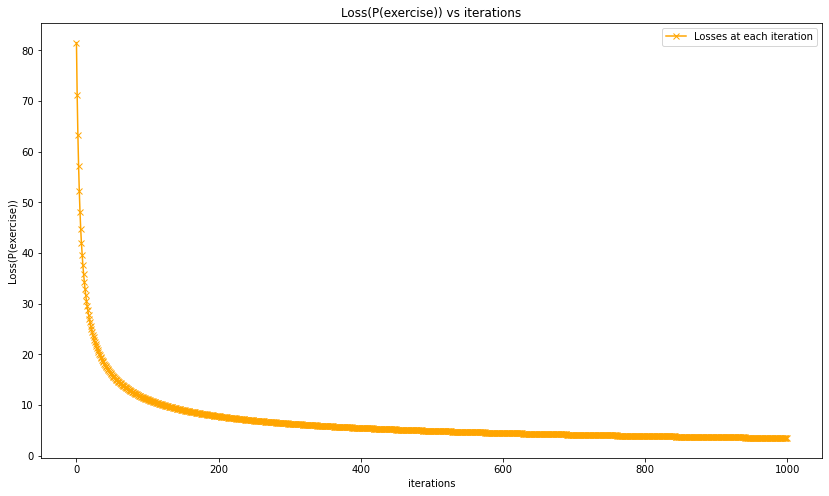

In [21]:
_,_,loss_l =  my_gradient_descent(data['P(exercise)'],convert_premium(data['Premiums']))
plt.figure(figsize = (14,8))
plt.title('Loss(P(exercise)) vs iterations')
plt.plot(range (len(loss_l)),loss_l,marker='x',color= 'orange',label='Losses at each iteration')
plt.ylabel('Loss(P(exercise))')
plt.xlabel('iterations')
plt.legend()

As our loss function is convex and differentiable for any small step size and for any error margin so if we run long enough then gradient descent will find global optimum where the loss is minimum.
Hence as we perform gradient descent, the values of m and b converge at global optimim.
we can see loss converging to zero as we do more iterations.

## 6. Come up with ten  different measures to classify how well your model performs, then explain the results.

### Confusion Matrix to measure the goodness of our model
#performance metrics

In [22]:
def my_confusion_matrix(Y,Y_hat):
    """
    Compares the predicted values for each class
    to check if they are correct or incorrect in the form
    
    True positive: Number of correctly predicted values as positive.
    False positive: Number of incorrectly predicted values as positive.
    True negative: Number of negative values predicted correctly as negative.
    False negative: Number of positive values predicted incorrectly as negative.
  
    """
    matrix = np.array([[0,0],[0,0]])
    
    for i in range (len(Y)):
        if Y[i]==1 and Y_hat[i]==1:
            matrix[0][0]+=1  
        elif Y[i]==1 and Y_hat[i]==0:
            matrix[0][1]+=1  
        elif Y[i]==0 and Y_hat[i]==1:
            matrix[1][0]+=1  
        else:
            matrix[1][1]+=1  
    
    TP = matrix[0][0] # True Positive
    FP = matrix[0][1] # False Positive
    FN = matrix[1][0] # False Negative
    TN = matrix[1][1] # True Negative

    N = len(Y)

    """
    1. Precision
    Checks how the model has correctly predicted the positive class.
    This metric is for optimizing the model to minimize the false positive.

    """
    precision = TP/(TP + FP)
    print(f"Precision: {precision}")
    
    """
    2. recall/sensitivity/hit rate / true positive rate(TPR)
    It tells the goodness of the model
    at correctly predicting all the positive observations.
    Actual positives identified correctly.
    """
    recall =  TP /(TP + FN)
    print(f"Recall: {recall}")
    
    """
    3. Error_rate
    It is the opposite of accuracy. 
    Error rate metrics are prone to class imbalance problem
    for incorrect predictions.
    """
    error_rate = (TN + FP) / N
    print(f"Error Rate : {error_rate}")

    """
    4. Prevalence
    How often yes condition actually occur in our sample.
    """
    prevalence = (TP + FN) / N
    print(f"Prevalence : { prevalence }")

    """
    5. Specificity is the ration of True Negatives to all those that are
    correctly indentified as not having the condition by the model.
    Closer the value of specificity to 1 better the precision of the model.
    Aim is to reduce the false positives to 0.
    """
    specificity= TN /( FP + TN)
    print(f"Specificity: {specificity}")

    
    negative_pred_value=  TN /( FN + TN)
    print(f"Negative Predicted Value: {negative_pred_value}")
    
    """
    6. F1-score
    It is a harmonic mean of precision and recall. 
    High value of F1 measure ensures both precision and recall are reasonably high.

    """
    f1 = 2*precision*recall/(precision+recall)
    print("F1 score:",f1)

    """
    7. Accuracy
    It is closeness of the measurements to a specific value.
    This metric tells how accurate each value is classified.

    """
    accuracy = (TP + TN) / N
    print(f'Accuracy : { accuracy }')

    """
    The average of recall obtained on each class.
    The best value is 1 and worst is 0.
    """
    balanced_accuracy = (TP + TN) / 2
    print(f"Balance Accuracy : {balanced_accuracy} %")
    
    #False Ommision Rate 
    FOR = FN/ (FN + TN)
    print(f'False Ommision Rate : {FOR}')

    return matrix 

### 'P(exercise)'

Precision: 1.0
Recall: 1.0
Error Rate : 0.49693251533742333
Prevalence : 0.5030674846625767
Specificity: 1.0
Negative Predicted Value: 1.0
F1 score: 1.0
Accuracy : 1.0
Balance Accuracy : 163.0 %
False Ommision Rate : 0.0


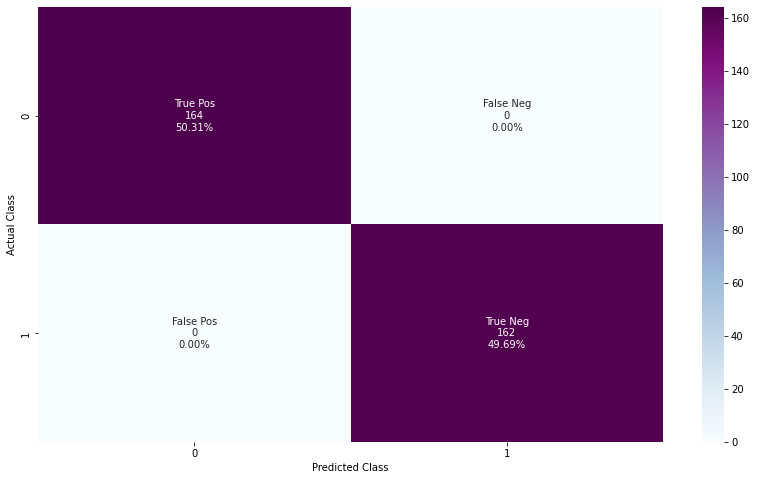

In [23]:
cf_matrix = my_confusion_matrix(convert_premium(data['Premiums']),predict_class(sigmoid_func(m1*data['P(exercise)']+b1)))
plt.figure(figsize = (14,8))
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='BuPu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

Explaination on each metrics

### 'P(smoker)'

Precision: 1.0
Recall: 1.0
Error Rate : 0.49693251533742333
Prevalence : 0.5030674846625767
Specificity: 1.0
Negative Predicted Value: 1.0
F1 score: 1.0
Accuracy : 1.0
Balance Accuracy : 163.0 %
False Ommision Rate : 0.0


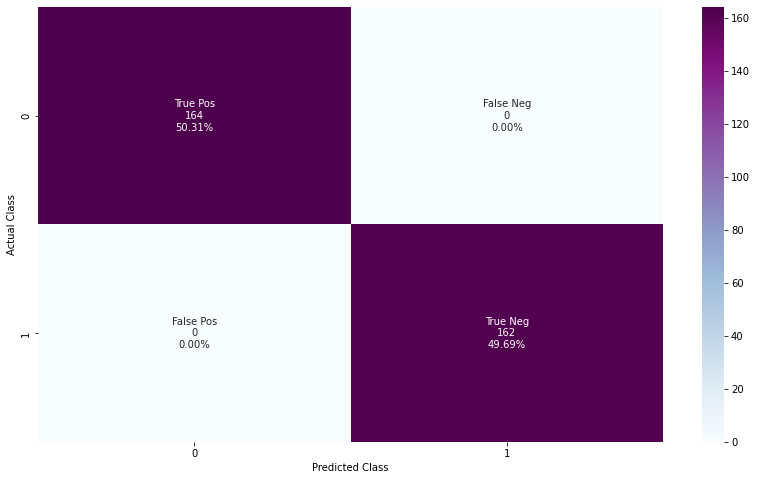

In [24]:
cf_matrix = my_confusion_matrix(convert_premium(data['Premiums']),predict_class(sigmoid_func(m*data['P(smoker)']+b)))
plt.figure(figsize = (14,8))
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='BuPu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## 7. Explain how this is an example of scaling up an ML model.

Logistic regression has a proper set of steps that need to be followed to get an optimised model. Firstly, one need to identify whether the problem is of classification or regression also the problem objective and kind of data types also need to be assessed properly to design the appropriate model. After that Data collection is done after this, in which data should present without any noise or biasness so as to have minimum impact in the actual ML model. Feature engineering is performed to achieve a better model by removing null values, outliers, and biasness, this is achieved by standardisation and normalisation techniques. After this feature which is the best classifier is selected and that will be the class label. Now, since we have the probabilistic data, logistic regression is performed for our problem.    

All these above mentioned steps needs to be followed to scale up the ML model
In our model we have used logistic regression, in which there is unit agnostic, ranging between (0, 1) so we don’t need to scale the model here. 
Scaling of an ML model can be done in one of the 2 ways given below :
• Scaling the ML model to be able to handle any size of data
• Feature scaling
Feature scaling is one of the most important steps during the pre-processing of the data It helps to make the Machine learning model stronger.
Feature scaling is mainly done by 2 techniques : Normalisation and standardization 
Here, in our ML model, normalisation is done. Normalisation is done when we want to the values to be within the range of 2 numbers, mostly [0, 1].
Here in this problem, we are not just dealing with single feature but multiple features, that is, probability of smoking and exercising.

## 8. Explain how gender affects this model.

 
As per the model the datapoints near the boundary line will shift to high premium class if they are male and if female it will not effect
as per our assumptions there might be some male policy holders who should be in the low premium near decision boundary where they might have crossed the decision boundary just because they are male,as being male increases the premium and if there are female then it wont effect their premium class predictions. 


## 9. Using the tuned model you already built, reapply it including the new testing data, and discuss the results. (Is it good Does it need retuning?)

In [25]:
test_data = pd.read_csv("test_data.csv")

In [26]:
# testing data prediction
test_x_smoker = test_data['test(P_smoker)']
test_x_exercise = test_data['test(P_exercise)']
predicted_smoker_class = predict_class(sigmoid_func(m*test_x_smoker+b))
predicted_exercise_class = predict_class(sigmoid_func(m1*test_x_exercise+b1))

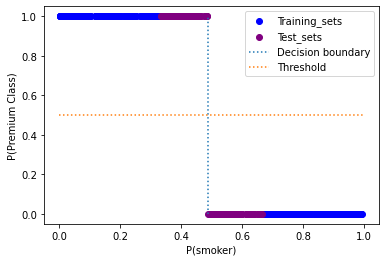

In [27]:
plt.scatter(x = data['P(smoker)'],y = predict_class(sigmoid_func(m*data['P(smoker)']+b)),color = 'blue',label = 'Training_sets')
plt.scatter(x = test_x_smoker,y = predict_class(sigmoid_func(m*test_data['test(P_smoker)']+b)),color='purple',label = 'Test_sets')
plt.plot([-b/m,-b/m],[0,1],linestyle='dotted',label='Decision boundary')
plt.ylabel('P(Premium Class)')
plt.xlabel('P(smoker)')
plt.plot([0,1],[0.5,0.5],linestyle='dotted',label='Threshold')
plt.legend()

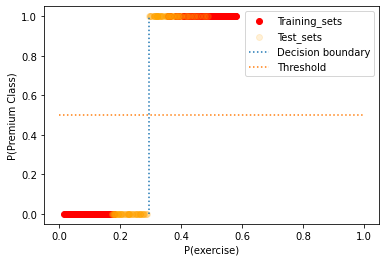

In [28]:
plt.scatter(x = data['P(exercise)'],y = predict_class(sigmoid_func(m1*data['P(exercise)']+b1)),color = 'red',label = 'Training_sets')
plt.scatter(x = test_x_exercise,y = predict_class(sigmoid_func(m1*test_data['test(P_exercise)']+b1)),color='orange',label = 'Test_sets',alpha = 0.15)
plt.plot([-b1/m1,-b1/m1],[0,1],linestyle='dotted',label='Decision boundary')
plt.ylabel('P(Premium Class)')
plt.xlabel('P(exercise)')
plt.plot([0,1],[0.5,0.5],linestyle='dotted',label='Threshold')
plt.legend()

In [29]:
def calculate_deviance(X): 
    L0 = 1
    LM= 1
    LS = 1
    
    if X == 'smoker':
        column = 0
        m_test= m
        b_test =b
        g = predicted_smoker_class

    else:
        column = 1
        m_test = m1
        b_test =b1
        g = predicted_exercise_class
    for i in range (len(test_data)):
        Z1 = sigmoid_func(b_test)
        L0 *= (Z1**g[i])*((1-Z1)**(1-g[i]))
        Z = sigmoid_func(m_test*test_data.iloc[i][column]+b_test)
        LM *= (Z**g[i])*((1-Z)**(1-g[i]))
    D0 =-2*np.log(L0)
    DM = -2*np.log(LM)
    R_squared = 1-(DM/D0)
    return R_squared, D0,DM
   

In [30]:
d1 = calculate_deviance('smoker')
d2 = calculate_deviance('exercise')
print(f"pseudo R_squared for P(smoker) model --->{d1[0]}\nNull_deviance for P(smoker) model--->{d1[1]}\nModel_Deviance for p(smoker) model ---->{d1[2]}")
print('**********************************************************')
print(f"pseudo R_squared for P(exercise) model --->{d2[0]}\nNull_deviance for P(exercise) model--->{d2[1]}\nModel_Deviance for p(exercise) model ---->{d2[2]}")

pseudo R_squared for P(smoker) model --->0.8061235619107895
Null_deviance for P(smoker) model--->697.8210117816186
Model_Deviance for p(smoker) model ---->135.29105218802923
**********************************************************
pseudo R_squared for P(exercise) model --->0.806174102461673
Null_deviance for P(exercise) model--->651.0300471868619
Model_Deviance for p(exercise) model ---->126.18648322041292


we classified the testing data into higher and lower premiums using our training model and those results were plotted in the above graph.As we don't have the actual labels of the test data,its not possible to calculate confusion matriX to determine the goodness of the model.However,we have calculated the deviance of null hypothesis and deviance of model in both the cases(P(smoker) and P(exercise)) and found that deviance of model is around 80% less compared to the base model.

## 10. Rebuild the model using ALL the data and discuss the results by comparing/contrasting.  Can you explain why the company should be allowed or not to use a probabilistic classifier?

In [37]:
y_hat_psmoker = predict_class(sigmoid_func(m*test_data['test(P_smoker)']+b))
y_hat_pexercise = predict_class(sigmoid_func(m1*test_data['test(P_exercise)']+b1))

In [38]:
total_Psmokerdata = np.append(data['P(smoker)'],test_data['test(P_smoker)'])
total_Pexercisedata = np.append(data['P(exercise)'],test_data['test(P_exercise)'])
total_target_Psmokerdata = np.append(convert_premium(data['Premiums']),y_hat_psmoker)
total_target_Pexercisedata = np.append(convert_premium(data['Premiums']),y_hat_pexercise)

#### Premiums vs P(smoker)

In [46]:
# Rebuilding for 'P(smoker)' including test data
m_new, b_new,_ =  my_gradient_descent(total_Psmokerdata,total_target_Psmokerdata)

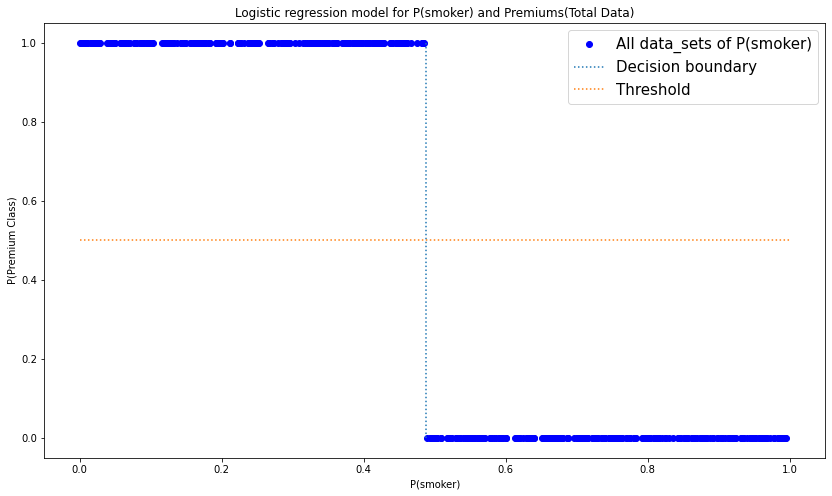

In [47]:
plt.figure(figsize = (14,8))
plt.title('Logistic regression model for P(smoker) and Premiums(Total Data)')
plt.scatter(x = total_Psmokerdata,y = predict_class(sigmoid_func(m_new*total_Psmokerdata+b_new)),color='blue',label = 'All data_sets of P(smoker)')
plt.plot([-b_new/m_new,-b_new/m_new],[0,1],linestyle='dotted',label='Decision boundary')
plt.ylabel('P(Premium Class)')
plt.xlabel('P(smoker)')
plt.plot([0,1],[0.5,0.5],linestyle='dotted',label='Threshold')
plt.legend(fontsize=15)
plt.show()

Precision: 1.0
Recall: 1.0
Error Rate : 0.5
Prevalence : 0.5
Specificity: 1.0
Negative Predicted Value: 1.0
F1 score: 1.0
Accuracy : 1.0
Balance Accuracy : 246.0 %
False Ommision Rate : 0.0


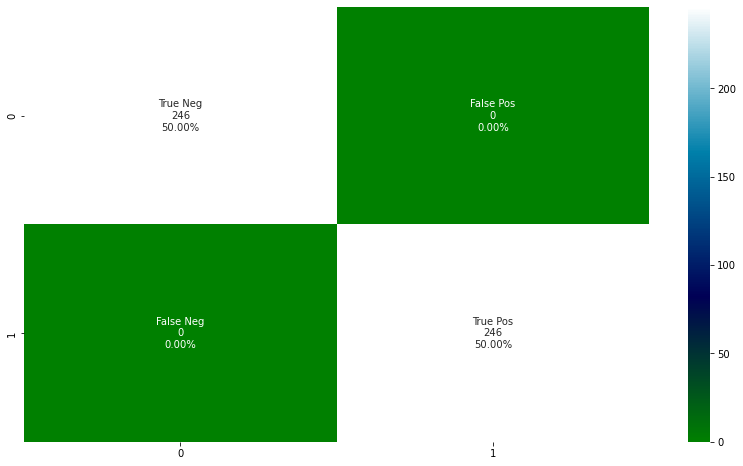

In [48]:
cf_matrix = my_confusion_matrix(total_target_Psmokerdata,predict_class(sigmoid_func(m_new*total_Psmokerdata+b_new)))
plt.figure(figsize = (14,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='ocean')
plt.show()

accuracy is still high

#### p(exercise) vs premiums

In [43]:
# Rebuilding for 'P(exercise)' including test data
m1_new,b1_new,_ =  my_gradient_descent(total_Pexercisedata,total_target_Pexercisedata)

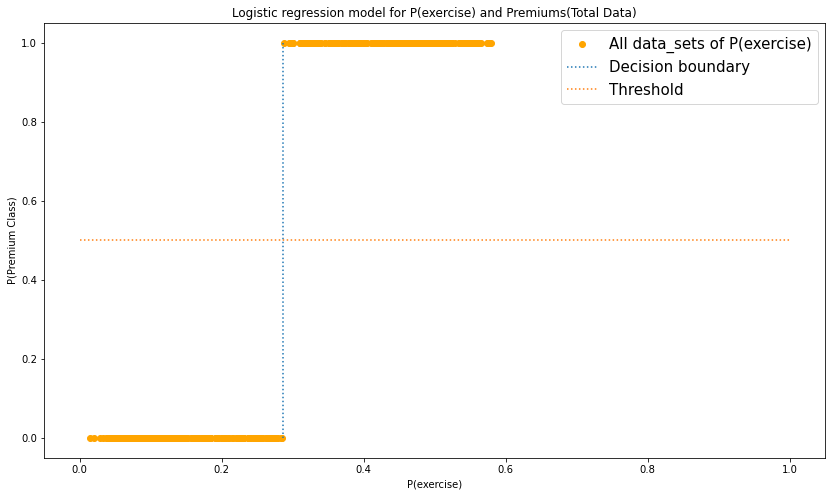

In [44]:
plt.figure(figsize = (14,8))
plt.title('Logistic regression model for P(exercise) and Premiums(Total Data)')
plt.scatter(x = total_Pexercisedata,y = predict_class(sigmoid_func(m1_new*total_Pexercisedata+b1_new)),color='orange',label = 'All data_sets of P(exercise)')
plt.plot([-b1_new/m1_new,-b1_new/m1_new],[0,1],linestyle='dotted',label='Decision boundary')
plt.ylabel('P(Premium Class)')
plt.xlabel('P(exercise)')
plt.plot([0,1],[0.5,0.5],linestyle='dotted',label='Threshold')
plt.legend(fontsize=15)
plt.show()

Precision: 1.0
Recall: 0.9960629921259843
Error Rate : 0.483739837398374
Prevalence : 0.516260162601626
Specificity: 1.0
Negative Predicted Value: 0.99581589958159
F1 score: 0.9980276134122288
Accuracy : 0.9979674796747967
Balance Accuracy : 245.5 %
False Ommision Rate : 0.0041841004184100415


<AxesSubplot:>

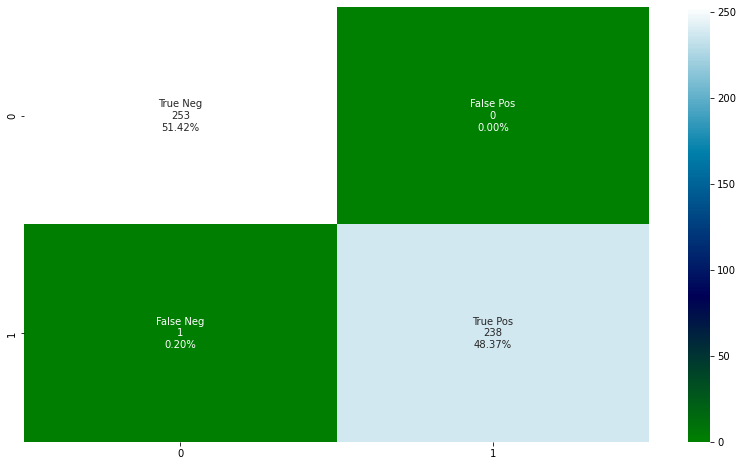

In [45]:
cf_matrix = my_confusion_matrix(total_target_Pexercisedata,predict_class(sigmoid_func(m1_new*total_Pexercisedata+b1_new)))
plt.figure(figsize = (14,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='ocean')

accuracy slightly drops